In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
## reading the data
df = pd.read_csv("D:\\Python\\Data_Analysis\\Weather_Forecasting\\DailyDelhiClimateTest.csv")

In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [7]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
fig = px.line(df, x='date', y='meantemp', title='Mean Temperature Over Time')
fig.show()

In [11]:
fig = px.line(df,x= "date", y="humidity", title="Humidity in Delhi Over Time")
fig.show()

In [13]:
fig = px.line(df, x='date', y='wind_speed', title='wind speed Over Time')
fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x='humidity', y='meantemp',size='meantemp', trendline='ols', title='Mean Temperature vs Humidity')
fig.show()

# Analyzing Temperature change

In [21]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1


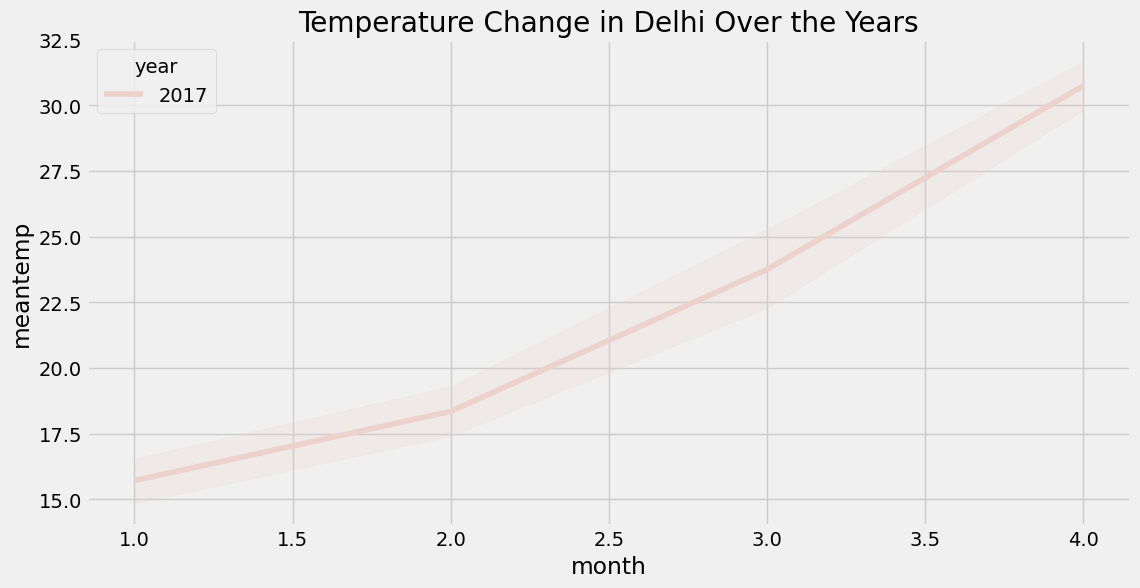

In [22]:
## Temperture change in Delhi over the years
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))
plt.title('Temperature Change in Delhi Over the Years')
sns.lineplot(data=df, x='month', y='meantemp', hue = 'year')
plt.show()

In [23]:
forecast_data = df.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})

In [24]:
forecast_data.head()

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1


In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

d:\Python\Data_Analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

15:39:11 - cmdstanpy - INFO - Chain [1] start processing
15:39:11 - cmdstanpy - INFO - Chain [1] done processing
